In [1]:
import pandas as pd
file_data = pd.read_csv('./dataset/file_data.csv')
file_data['가격'] = [5000,5000,4000,5000,3000]
file_data

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000


In [2]:
df1 = file_data.copy()
df2 = pd.DataFrame({
    '차림표':['비빔밥','돈까스','라면','김밥','제육덮밥'],
    '가격':[7000,8000,3000,3000,9000]
})
df2

,차림표,가격
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [3]:
# 병합 - 세로방향
dfc1 = pd.concat([df1,df2])
dfc1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [4]:
# 병합 - 가로방향
dfc2 = pd.concat([df1,df2],axis=1)
dfc2

,차림표,가격,차림표,가격
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [5]:
new_column = ['메뉴1','가격1','메뉴2','가격2']
dfc2.columns = new_column
dfc2

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [6]:
sr1 = dfc2['메뉴1']
sr2 = dfc2['가격2']
print(sr1,'\n')
print(sr2)

0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
Name: 메뉴1, dtype: object 

0    7000
1    8000
2    3000
3    3000
4    9000
Name: 가격2, dtype: int64


In [7]:
# 시리즈 -> 데이터프레임
df = pd.concat([sr1,sr2],axis=1)
df

,메뉴1,가격2
0,냉면,7000
1,칼국수,8000
2,잔치국수,3000
3,수제비,3000
4,우동,9000


In [8]:
# 열 삭제, inplace=True는 원본에 반영함을 의미 
dfc3 = dfc2.copy()
dfc3.drop(['가격1','가격2'],axis=1,inplace=True)
# dfc3.drop(['가격1','가격2'],axis=1)
dfc3

,메뉴1,메뉴2
0,냉면,비빔밥
1,칼국수,돈까스
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [9]:
# 행 삭제
dfc3.drop([0,1],axis=0,inplace=True)
dfc3

,메뉴1,메뉴2
2,잔치국수,라면
3,수제비,김밥
4,우동,제육덮밥


In [21]:
dfc3 = dfc2.copy()
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000


In [11]:
# [과제] 인덱싱을 이용하여 특정 컬럼, 특정 행, 특정 값을 추출

In [23]:
a = dfc3['메뉴1']
b = dfc3[1:4]
c = dfc3[['가격1','가격2']]
# 행 인덱싱
x = dfc3.loc[1]
y = dfc3.iloc[1,1]
z = dfc3.loc[dfc3['가격2']==3000,['메뉴2','가격2']]
print(a,'\n')
print(b,'\n')
print(c,'\n')

print(x,'\n')
print(y,'\n')
print(z)


0      냉면
1     칼국수
2    잔치국수
3     수제비
4      우동
Name: 메뉴1, dtype: object 

    메뉴1   가격1  메뉴2   가격2
1   칼국수  5000  돈까스  8000
2  잔치국수  4000   라면  3000
3   수제비  5000   김밥  3000 

    가격1   가격2
0  5000  7000
1  5000  8000
2  4000  3000
3  5000  3000
4  3000  9000 

메뉴1     칼국수
가격1    5000
메뉴2     돈까스
가격2    8000
Name: 1, dtype: object 

5000 

  메뉴2   가격2
2  라면  3000
3  김밥  3000


In [13]:
# 조건(하나 또는 복수)에 맞는 데이터 추출 - 불린인덱싱
dfc3.loc[dfc3['가격1']>4500,['메뉴1','가격1']]

,메뉴1,가격1
0,냉면,5000
1,칼국수,5000
3,수제비,5000


In [14]:
# [과제] 행, 열 모두에 조건 지정

In [24]:
dfc3.loc[(dfc3['가격2']>4000) & (dfc3.메뉴2!='돈까스'), ['메뉴2', '가격2']]

,메뉴2,가격2
0,비빔밥,7000
4,제육덮밥,9000


In [15]:
# 행 추가
dfc3.loc[5] = ['김치라면', '4000', '만두', '5000']
dfc3

,메뉴1,가격1,메뉴2,가격2
0,냉면,5000,비빔밥,7000
1,칼국수,5000,돈까스,8000
2,잔치국수,4000,라면,3000
3,수제비,5000,김밥,3000
4,우동,3000,제육덮밥,9000
5,김치라면,4000,만두,5000


In [16]:
# 열 추가 
dfc3['메뉴3'] = dfc3.메뉴2
dfc3

,메뉴1,가격1,메뉴2,가격2,메뉴3
0,냉면,5000,비빔밥,7000,비빔밥
1,칼국수,5000,돈까스,8000,돈까스
2,잔치국수,4000,라면,3000,라면
3,수제비,5000,김밥,3000,김밥
4,우동,3000,제육덮밥,9000,제육덮밥
5,김치라면,4000,만두,5000,만두


In [17]:
dfc1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
0,비빔밥,7000
1,돈까스,8000
2,라면,3000
3,김밥,3000
4,제육덮밥,9000


In [18]:
# 인덱시 재정렬
ndf = dfc1.reset_index()
ndf.drop('index',axis=1,inplace=True)
ndf

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [19]:
ndf1 = ndf.copy()
ndf1

,차림표,가격
0,냉면,5000
1,칼국수,5000
2,잔치국수,4000
3,수제비,5000
4,우동,3000
5,비빔밥,7000
6,돈까스,8000
7,라면,3000
8,김밥,3000
9,제육덮밥,9000


In [20]:
# 인덱스 설정
ndf1.index=np.arange(1,11)
ndf1

NameError: name 'np' is not defined

In [ ]:
# 인덱스 지정한 데로 설정 : reindex
new_index = np.arange(1,15)
ndf2 = ndf1.reindex(new_index,fill_value=0)
ndf2

In [ ]:
# 내림차순 정렬
ndf2 = ndf1.sort_index(ascending=False)
ndf2

In [ ]:
ndf3 = ndf2.sort_index(ascending=True)
ndf3

In [ ]:
ndf4 = ndf2.sort_values(by='가격',ascending=False)
ndf4

In [25]:
import numpy as np
columns = ['kor','eng','art','math','gym','sci']
index = ['jim','sam','tom','tim','bob']
np.random.seed()
data = np.random.randint(70,100,size=(5,6))
df = pd.DataFrame(data,index,columns=columns)
df

,kor,eng,art,math,gym,sci
jim,87,84,95,98,80,79
sam,77,82,90,70,83,95
tom,72,80,98,92,72,79
tim,97,99,99,86,96,87
bob,87,99,98,82,81,89


[과제] iloc, loc를 이용해서 아래 요구사항들을 출력하세요
- df의 kor열을 series와 dataframe을 각각 출력
- df에서 sam의 math 점수를 출력(2가지 방법)
- df에서 tom의 eng와 sci 점수를 출력(2가지 방법)
- df에서 jim, tim의 eng, gym 점수를 출력
- df에서 jim, sam의 art,math,gym 점수를 출력

In [28]:
a1 = df.iloc[:,0]
print(a1,type(a1),'\n')
a2 = df.iloc[:,[0]]
print(a2,type(a2))

jim    87
sam    77
tom    72
tim    97
bob    87
Name: kor, dtype: int32 <class 'pandas.core.series.Series'> 

     kor
jim   87
sam   77
tom   72
tim   97
bob   87 <class 'pandas.core.frame.DataFrame'>


In [26]:
a1=df['kor']
print(a1,type(a1),'\n')
a2=df[['kor']]
print(a2,type(a2),'\n')

jim    87
sam    77
tom    72
tim    97
bob    87
Name: kor, dtype: int32 <class 'pandas.core.series.Series'> 

     kor
jim   87
sam   77
tom   72
tim   97
bob   87 <class 'pandas.core.frame.DataFrame'> 



In [29]:
print(df.loc['sam','math'])
print(df.iloc[1,3])

70
70


In [32]:
print(df.loc['tom',['eng','sci']],'\n')
print(df.iloc[2,[1,5]])

eng    80
sci    79
Name: tom, dtype: int32 

eng    80
sci    79
Name: tom, dtype: int32


In [33]:
print(df.iloc[[0,3],[1,4]])

     eng  gym
jim   84   80
tim   99   96


In [36]:
print(df.loc['jim':'sam','art':'gym'],'\n')
print(df.iloc[0:2,2:5])

     art  math  gym
jim   95    98   80
sam   90    70   83 

     art  math  gym
jim   95    98   80
sam   90    70   83


[과제] iloc, loc를 이용해서 아래 요구사항들을 수행하세요
- df에서 sam의 math 점수를 100으로 변경
- df에서 tom의 eng와 math 점수를 100으로 변경
- df에서 jim, tim의 kor, gym 점수를 null값으로 변경
- df에서 math와 gym 점수를 바꾸어 출력

In [37]:
df1 = df.copy()
df1.loc['sam','math'] = 100
df1

,kor,eng,art,math,gym,sci
jim,87,84,95,98,80,79
sam,77,82,90,100,83,95
tom,72,80,98,92,72,79
tim,97,99,99,86,96,87
bob,87,99,98,82,81,89


In [38]:
df2 = df.copy()
df2.loc['tom',['eng','math']] = 100
df2

,kor,eng,art,math,gym,sci
jim,87,84,95,98,80,79
sam,77,82,90,70,83,95
tom,72,100,98,100,72,79
tim,97,99,99,86,96,87
bob,87,99,98,82,81,89


In [39]:
df3 = df.copy()
df3.loc[['jim','tim'],['kor','gym']] = np.nan
df3

,kor,eng,art,math,gym,sci
jim,NaN,84,95,98,NaN,79
sam,77.0,82,90,70,83.0,95
tom,72.0,80,98,92,72.0,79
tim,NaN,99,99,86,NaN,87
bob,87.0,99,98,82,81.0,89


In [44]:
df

,kor,eng,art,math,gym,sci
jim,87,84,95,98,80,79
sam,77,82,90,70,83,95
tom,72,80,98,92,72,79
tim,97,99,99,86,96,87
bob,87,99,98,82,81,89


In [45]:
df2=df.copy()
df2['tmp']=df2.math
df2.math=df2.gym
df2.gym=df2.tmp
df3=df2.drop('tmp',axis=1)
print(df,'\n\n',df3)

     kor  eng  art  math  gym  sci
jim   87   84   95    98   80   79
sam   77   82   90    70   83   95
tom   72   80   98    92   72   79
tim   97   99   99    86   96   87
bob   87   99   98    82   81   89 

      kor  eng  art  math  gym  sci
jim   87   84   95    80   98   79
sam   77   82   90    83   70   95
tom   72   80   98    72   92   79
tim   97   99   99    96   86   87
bob   87   99   98    81   82   89


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

In [ ]:
# [과제] 데이터 추출(인덱싱, 조건), 변경, 삭제, 정렬, 칼럼 병합(sibsp + parch = family) 등을 수행하여 데이터에서 인사이트를 찾아보세요 

In [46]:
import numpy as np
import pandas as pd
data = np.arange(20).reshape(4,5)
df = pd.DataFrame(data,columns=['a','b','c','d','e'])
df.head()

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [52]:
# 삭제
df1 = df.copy()
df1.drop(df1.index[[0,3]])

,a,b,c,d,e
1,5,6,7,8,9
2,10,11,12,13,14


In [53]:
# 특정 조건에 맞는 인덱스 구하기
df1 = df.copy()
idx = df1[df1.a > 10].index
df1.drop(idx)

Int64Index([3], dtype='int64')

In [59]:
li = []
for i in range(100):
    li.append('c'+str(i+1))
print(li)

['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'c51', 'c52', 'c53', 'c54', 'c55', 'c56', 'c57', 'c58', 'c59', 'c60', 'c61', 'c62', 'c63', 'c64', 'c65', 'c66', 'c67', 'c68', 'c69', 'c70', 'c71', 'c72', 'c73', 'c74', 'c75', 'c76', 'c77', 'c78', 'c79', 'c80', 'c81', 'c82', 'c83', 'c84', 'c85', 'c86', 'c87', 'c88', 'c89', 'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99', 'c100']


In [62]:
data = np.random.randn(10000).reshape(100,100)
df = pd.DataFrame(data,columns=li)
df['c2'] = df.c2 * 100
df.iloc[1] = df.iloc[1] * 100
df.head()

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,c100
0,0.263516,63.295804,-1.076646,2.017237,0.263162,-1.853397,-0.249082,0.915746,-1.139063,-0.813635,...,-0.108274,1.487642,-1.865524,0.003079,0.552772,-0.627417,0.316127,-0.202001,-1.363629,-0.605897
1,-87.371706,3677.635095,-80.813349,-19.195016,62.111086,-6.299075,175.851134,19.385278,-42.241499,46.890890,...,-236.791958,64.690718,1.665373,46.430315,115.881702,-171.284129,-72.867737,-14.882382,-170.108256,28.292925
2,-1.855527,-149.259703,-1.620079,0.403859,-0.207481,1.447295,-1.255921,-0.570784,-0.750922,-0.590539,...,-1.489298,0.914669,1.200944,0.800696,-0.325610,-0.537603,-1.676400,0.517360,0.691598,1.503838
3,-0.856531,-67.255422,-1.018686,-0.272421,-0.729571,0.137707,-1.577691,1.924093,-1.212687,0.003352,...,-0.523055,-1.707774,-0.332522,0.207232,0.085483,0.625083,0.499258,-0.853705,0.466095,0.572882
4,0.103709,9.259462,-0.975712,0.371375,0.672784,-0.155414,0.442964,0.754206,-0.291714,0.750766,...,-0.831669,-0.189912,0.945853,-0.187770,0.581158,1.625453,-0.943276,-0.412871,-0.223766,-1.015461


In [64]:
df1 = df.copy()
idx = df1[df1.c2 > 10].index
print(idx)

Int64Index([ 0,  1,  7,  9, 12, 16, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34,
            39, 47, 52, 56, 57, 61, 63, 68, 69, 71, 72, 74, 75, 76, 77, 80, 83,
            84, 87, 89, 91, 92, 93, 96, 97, 98],
           dtype='int64')


In [ ]:
df1.drop(idx)

In [66]:
df1 = df.copy()
idx = df1.query('c2 > 10').index
print(idx)

Int64Index([ 0,  1,  7,  9, 12, 16, 21, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34,
            39, 47, 52, 56, 57, 61, 63, 68, 69, 71, 72, 74, 75, 76, 77, 80, 83,
            84, 87, 89, 91, 92, 93, 96, 97, 98],
           dtype='int64')


In [69]:
df1 = df.copy()
cond1 = df1.c2 > 10
cond2 = df1.c3 > 0
cond3 = df.c4 < 0

df2 = df1[cond1 & cond2 & cond3]
df2.shape

(11, 100)

In [70]:
df3 = df1[cond1 | cond2 | cond3]
df3.shape

(87, 100)

In [72]:
df1[cond1][['c1','c2']].head()

,c1,c2
0,0.263516,63.295804
1,-87.371706,3677.635095
7,-0.853460,84.671048
9,0.588250,64.792823
12,-0.627961,35.452712


In [73]:
import seaborn as sns
df = sns.load_dataset('titanic')
tdf = df.copy()
tdf.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [74]:
# 컬럼이름 변경
tdf.rename(columns={'sex':'gender','fare':'ticket'}, inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
tdf.gender.value_counts()
# tdf.gender.unique()

male      577
female    314
Name: gender, dtype: int64

In [78]:
# 값 변경
df1 = tdf[['gender']].replace(['female','male'],[1,0])
df1.gender.value_counts()

0    577
1    314
Name: gender, dtype: int64

In [79]:
# 칼럼 대문자 변경
tdf.rename(str.upper, axis='columns',inplace=True)
tdf.head()

,SURVIVED,PCLASS,GENDER,AGE,SIBSP,PARCH,TICKET,EMBARKED,CLASS,WHO,ADULT_MALE,DECK,EMBARK_TOWN,ALIVE,ALONE
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
# 칼럼 소문자 변경
tdf.rename(str.lower, axis='columns',inplace=True)
tdf.head()

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
# 칼럼 순서 변경
columns_customed = ['pclass','gender','age','survived']
tdf[columns_customed].head()

,pclass,gender,age,survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [83]:
# NaN 으로 변경
df1 = df.copy()
df1['sex'] = df1.sex.replace('male', np.nan)
df1.sex.value_counts()

female    314
Name: sex, dtype: int64

In [85]:
tdf.head(2)

,survived,pclass,gender,age,sibsp,parch,ticket,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [84]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   gender       891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   ticket       891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [93]:
tdf.deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [92]:
tdf.gender.value_counts()

male      577
female    314
Name: gender, dtype: int64

In [91]:
tdf.who.value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [86]:
tdf.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [90]:
tdf.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [94]:
# 결측값 대체 : age 평균값
print(tdf.age.isnull().sum(),'\n')
tdf.age.fillna(tdf.age.mean(),inplace=True)
tdf.age.isnull().sum()

177 



0

In [96]:
tdf1 = df.copy()
tdf1.age.replace(np.nan, tdf1.age.mean(), inplace=True)
tdf1.age.isnull().sum()

0

In [97]:
# 결측값 삭제
tdf2 = df.copy()
tdf2.dropna(subset=['age'],inplace=True)
print(len(tdf2),'\n')
tdf2.age.isnull().sum()

714 



0

In [105]:
tdf[['age','ticket']].head()

,age,ticket
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [109]:
# 실수를 정수로 변환하여 출력
tdf[['age','ticket']].astype(int).head()

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [113]:
tdf1 = tdf[['age','ticket']].astype({'age':'int','ticket':'int'})
tdf1.head()

,age,ticket
0,22,7
1,38,71
2,26,7
3,35,53
4,35,8


In [114]:
# age 칼럼의 값 구성 체크
tdf.age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: age, Length: 89, dtype: int64

In [115]:
# age 칼럼의 고유 구성 요소
tdf.age.unique()

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [117]:
# age 칼럼의 범주화
def get_category(age):
    cat=''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 19: cat = 'Teenager'
    elif age <= 35: cat = 'Yong Adult'
    elif age <= 60: cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat
tdf['age_cat'] = tdf.age.apply(lambda x:get_category(x))
tdf[['age','age_cat']].head()

,age,age_cat
0,22.0,Yong Adult
1,38.0,Adult
2,26.0,Yong Adult
3,35.0,Yong Adult
4,35.0,Yong Adult


In [40]:
# 인코딩 : 문자를 숫자로 변환
tdf = df.copy()
df1 = tdf[['sex','class']]
df1.head()

KeyError: "None of [Index(['sex', 'class'], dtype='object')] are in the [columns]"

In [126]:
df1.value_counts('class')

class
2    491
0    216
1    184
dtype: int64

In [120]:
!pip install scikit-learn

In [39]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
features = ['sex','class']
for feature in features:
    df1[feature] = le.fit_transform(df1[feature])
df1.head()

NameError: name 'df1' is not defined

In [128]:
tdf = df.copy()
df1 = tdf[['sex','class']]
df1.head()

,sex,class
0,male,Third
1,female,First
2,female,Third
3,female,First
4,male,Third


In [130]:
from sklearn.preprocessing import OneHotEncoder

items = list(df1.sex)
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)
oh_encoder = OneHotEncoder()
oh_labels = oh_encoder.fit_transform(labels)
print(oh_labels.toarray(), oh_labels.shape)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]] (891, 2)


In [131]:
pd.get_dummies(df1).head()

,sex_female,sex_male,class_First,class_Second,class_Third
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,1,0,0
4,0,1,0,0,1


In [4]:
import pandas as pd
import numpy as np


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [6]:
raw_df.shape

(1012, 11)

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [12]:
df_org = pd.DataFrame(boston.data, columns=[boston.feature_names])
df_org['target'] = boston.target
df_org.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
df = df_org[['INDUS','RM','PTRATIO','LSTAT','target']]
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,6.575,15.3,4.98,24.0
1,7.07,6.421,17.8,9.14,21.6
2,7.07,7.185,17.8,4.03,34.7
3,2.18,6.998,18.7,2.94,33.4
4,2.18,7.147,18.7,5.33,36.2


In [14]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['RM'] = scaler.fit_transform(df.RM)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,2.31,0.577505,15.3,4.98,24.0
1,7.07,0.547998,17.8,9.14,21.6
2,7.07,0.694386,17.8,4.03,34.7
3,2.18,0.658555,18.7,2.94,33.4
4,2.18,0.687105,18.7,5.33,36.2


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (INDUS,)    506 non-null    float64
 1   (RM,)       506 non-null    float64
 2   (PTRATIO,)  506 non-null    float64
 3   (LSTAT,)    506 non-null    float64
 4   (target,)   506 non-null    float64
dtypes: float64(5)
memory usage: 19.9 KB


In [19]:
li = ['INDUS','RM','PTRATIO','LSTAT','target']
for i in li:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [154]:
df.corr()

,INDUS,RM,PTRATIO,LSTAT,target
INDUS,1.000000,-0.391676,0.383248,0.603800,-0.483725
RM,-0.391676,1.000000,-0.355501,-0.613808,0.695360
PTRATIO,0.383248,-0.355501,1.000000,0.374044,-0.507787
LSTAT,0.603800,-0.613808,0.374044,1.000000,-0.737663
target,-0.483725,0.695360,-0.507787,-0.737663,1.000000


<AxesSubplot:xlabel='None', ylabel='None'>

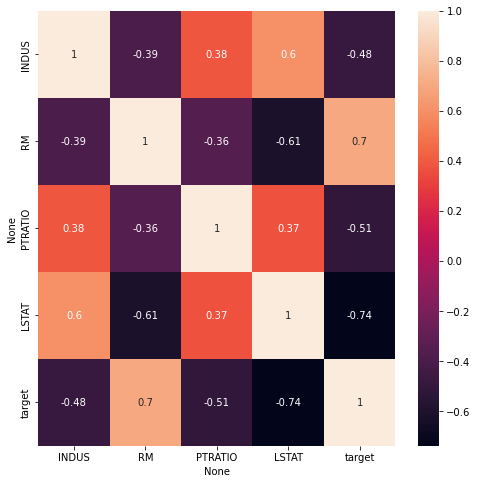

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:ylabel='Density'>

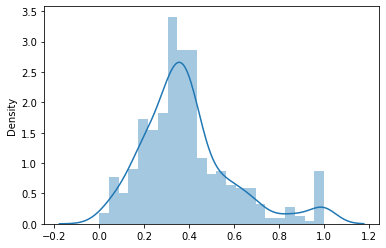

In [158]:
sns.distplot(df[['target']])

<AxesSubplot:ylabel='Density'>

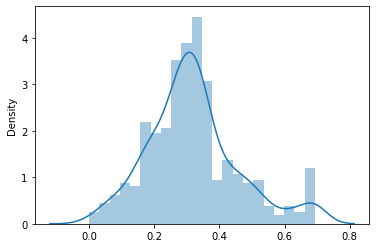

In [159]:
# 로그 변환
import numpy as np
df['target'] = np.log1p(df.target)
sns.distplot(df.target)

In [161]:
# 로그 변환 환원
df['target'] = np.expm1(df.target)
df.head()

,INDUS,RM,PTRATIO,LSTAT,target
0,0.067815,0.577505,0.287234,0.089680,0.422222
1,0.242302,0.547998,0.553191,0.204470,0.368889
2,0.242302,0.694386,0.553191,0.063466,0.660000
3,0.063050,0.658555,0.648936,0.033389,0.631111
4,0.063050,0.687105,0.648936,0.099338,0.693333


In [ ]:
# [과제] mtcars.csv를 불러와서 0 ~ 1 스케일로 정규화한 후 qsec 컬럼이 0.5보다 큰 관측치의 개수를 구하시오.

In [38]:
file_data = pd.read_csv("./dataset/mtcars.csv")
scaler = MinMaxScaler()
li =['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs','am', 'gear', 'carb']  #스케일러 변수로 시리즈(1D)는 에러를 발생시킴

for i in li:
    file_data[i] = scaler.fit_transform(file_data[[i]])        #   fit_transform method expects 2D array

# print(file_data.head())
len(file_data.loc[file_data['qsec']>0.5,['qsec']])


9

In [31]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("./dataset/mtcars.csv",index_col=0)
# print(df.head(),type(df),'\n')
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
# print(type(scaled))
df = pd.DataFrame(scaled,columns=df.columns)
print(len(df.loc[df['qsec']>0.5,['qsec']]))

                    mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
Mazda RX4          21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag      21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710         22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive     21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

                   carb  
Mazda RX4             4  
Mazda RX4 Wag         4  
Datsun 710            1  
Hornet 4 Drive        1  
Hornet Sportabout     2   <class 'pandas.core.frame.DataFrame'> 

<class 'numpy.ndarray'>
9


In [164]:
df = pd.read_csv('./dataset/mtcars.csv',index_col=0)
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [162]:
# 결합
data1 = np.arange(1,21).reshape(4,5)
data2 = np.arange(11,31).reshape(5,4)
df1 = pd.DataFrame(data1,columns=['a','b','c','d','e'])
df2 = pd.DataFrame(data2,columns=['d','e','h','i'])
print(df1,'\n')
print(df2)

    a   b   c   d   e
0   1   2   3   4   5
1   6   7   8   9  10
2  11  12  13  14  15
3  16  17  18  19  20 

    d   e   h   i
0  11  12  13  14
1  15  16  17  18
2  19  20  21  22
3  23  24  25  26
4  27  28  29  30


In [172]:
# 열방향 결합
con1 = pd.concat([df1,df2], axis=1)
con1

,a,b,c,d,e,d,e,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [170]:
# 행방향 결합
con2 = pd.concat([df1,df2],axis=0)
con2

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
0,NaN,NaN,NaN,11,12,13.0,14.0
1,NaN,NaN,NaN,15,16,17.0,18.0
2,NaN,NaN,NaN,19,20,21.0,22.0
3,NaN,NaN,NaN,23,24,25.0,26.0
4,NaN,NaN,NaN,27,28,29.0,30.0


In [171]:
con3 = pd.concat([df1,df2],axis=0,ignore_index=True)
con3

,a,b,c,d,e,h,i
0,1.0,2.0,3.0,4,5,NaN,NaN
1,6.0,7.0,8.0,9,10,NaN,NaN
2,11.0,12.0,13.0,14,15,NaN,NaN
3,16.0,17.0,18.0,19,20,NaN,NaN
4,NaN,NaN,NaN,11,12,13.0,14.0
5,NaN,NaN,NaN,15,16,17.0,18.0
6,NaN,NaN,NaN,19,20,21.0,22.0
7,NaN,NaN,NaN,23,24,25.0,26.0
8,NaN,NaN,NaN,27,28,29.0,30.0


In [173]:
df1

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20


In [174]:
df2

,d,e,h,i
0,11,12,13,14
1,15,16,17,18
2,19,20,21,22
3,23,24,25,26
4,27,28,29,30


In [178]:
# 교집합
df1.join(df2,lsuffix='_a',rsuffix='_b',how='inner')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1,2,3,4,5,11,12,13,14
1,6,7,8,9,10,15,16,17,18
2,11,12,13,14,15,19,20,21,22
3,16,17,18,19,20,23,24,25,26


In [177]:
# 합집합
df1.join(df2,lsuffix='_a',rsuffix='_b',how='outer')

,a,b,c,d_a,e_a,d_b,e_b,h,i
0,1.0,2.0,3.0,4.0,5.0,11,12,13,14
1,6.0,7.0,8.0,9.0,10.0,15,16,17,18
2,11.0,12.0,13.0,14.0,15.0,19,20,21,22
3,16.0,17.0,18.0,19.0,20.0,23,24,25,26
4,NaN,NaN,NaN,NaN,NaN,27,28,29,30


In [180]:
df1['ind'] = [1,2,3,4]
df2['ind'] = [1,2,3,4,5]
df1.set_index('ind').join(df2.set_index('ind'),lsuffix='_a',rsuffix='_b')

,a,b,c,d_a,e_a,d_b,e_b,h,i
ind,,,,,,,,,
1,1,2,3,4,5,11,12,13,14
2,6,7,8,9,10,15,16,17,18
3,11,12,13,14,15,19,20,21,22
4,16,17,18,19,20,23,24,25,26


In [184]:
pd.merge(df1,df2,on='ind',how='inner') # 합집합 how = 'outer'

,a,b,c,d_x,e_x,ind,d_y,e_y,h,i
0,1,2,3,4,5,1,11,12,13,14
1,6,7,8,9,10,2,15,16,17,18
2,11,12,13,14,15,3,19,20,21,22
3,16,17,18,19,20,4,23,24,25,26


In [48]:
# 판다스 파일 읽고 저장
# csv 파일 읽고 저장
ar1 = np.arange(10)
li1 = ar1.reshape(2,5)
df = pd.DataFrame(li1, columns = ['c0','c1','c2','c3','c4'])
df.to_csv('./dataset/read_csv_sample.csv',index=False)
# df.to_csv('./dataset/read_csv_sample.csv')

In [49]:
df1 = pd.read_csv('./dataset/read_csv_sample.csv')
# df1 = pd.read_csv('./dataset/read_csv_sample.csv',index_col=0)
df1

,c0,c1,c2,c3,c4
0,0,1,2,3,4
1,5,6,7,8,9


In [50]:
# header=None 옵션(데이터셋에 헤더가 없는 경우)
df1 = pd.read_csv('./dataset/read_csv_sample.csv',header=None)
df1

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [52]:
# Json 파일 읽고 쓰기

df1.to_json('./dataset/df_j.json')
df_j = pd.read_json('./dataset/df_j.json')
df_j

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [53]:
# 바이너리 파일로 읽고 쓰기
df1.to_pickle('./dataset/df2.pkl')
df2 = pd.read_pickle('./dataset/df2.pkl')
df2

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,0,1,2,3,4
2,5,6,7,8,9


In [54]:
# 파이썬 외장함수(pickle)
import pickle
f = open('./dataset/test.txt','wb')
data = {1:'python',2:'you need'}
pickle.dump(data,f)
f.close()

In [55]:
f = open('./dataset/test.txt','rb')
data = pickle.load(f)
print(data)
f.close()

{1: 'python', 2: 'you need'}


In [57]:
!pip install openpyxl

In [58]:
# 엑셀 파일
df_ex = pd.read_excel('./dataset/auto-mpg.xlsx')
df_ex.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [59]:
df_ex.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [61]:
df_ex1 = df_ex[['mpg', 'cylinders','horsepower', 'weight']]
df_ex1.to_excel('./dataset/auto-mpg_ex1.xlsx',index=False)
df_ex1 = pd.read_excel('./dataset/auto-mpg_ex1.xlsx')
df_ex1.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


연산
- 행/열 인덱스를 기준으로 모든 원소를 정렬한다.
- 동일한 위치에 있는 원소끼리 일대일 대응시킨다.
- 일대일 대응이 되는 원소끼리 연산을 처리한다.

In [65]:
st1 = pd.Series({'국어':100,'영어':80,'수학':90})
st2 = pd.Series({'수학':80,'국어':90,'영어':80})

add = st1 + st2
sub = st1 - st2
mul = st1 * st2
div = round((st1/st2),2)
print(type(add))
df = pd.concat([add,sub,mul,div],axis=1)
df

<class 'pandas.core.series.Series'>


,0,1,2,3
국어,190,10,9000,1.11
수학,170,10,7200,1.12
영어,160,0,6400,1.00


In [66]:
st1 = pd.Series({'국어':100,'영어':80,'수학':90})
st2 = pd.Series({'수학':80,'국어':90,'영어':80})

add = st1 + st2
sub = st1 - st2
mul = st1 * st2
div = round((st1/st2),2)

result = pd.DataFrame([add,sub,mul,div],index=['덧셈','뺄셈','곱셈','나눗셈'])
result

,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


In [67]:
li = list('abcdefg')
li

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [69]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4),columns=list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [70]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4),columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape(4,5),columns=list('abcde'))

df2.loc[1,'b'] = np.nan
print(df1,'\n')
print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0 

      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [71]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [73]:
df1.add(df2,fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [ ]:
# sub(), mul(), div()을 사용하여 df2의 NaN 값을 0으로 대체하여 연산을 수행하세요.

In [75]:
sub_data = df1.sub(df2,fill_value=0)
mul_data = df1.mul(df2,fill_value=0)
div_data = round(df1.div(df2,fill_value=0),2)
print(sub_data,'\n')
print(mul_data,'\n')
print(div_data)

      a     b     c     d     e
0   0.0   0.0   0.0   0.0  -4.0
1  -1.0   5.0  -1.0  -1.0  -9.0
2  -2.0  -2.0  -2.0  -2.0 -14.0
3 -15.0 -16.0 -17.0 -18.0 -19.0 

      a     b      c      d    e
0   0.0   1.0    4.0    9.0  0.0
1  20.0   0.0   42.0   56.0  0.0
2  80.0  99.0  120.0  143.0  0.0
3   0.0   0.0    0.0    0.0  0.0 

     a     b     c     d    e
0  NaN  1.00  1.00  1.00  0.0
1  0.8   inf  0.86  0.88  0.0
2  0.8  0.82  0.83  0.85  0.0
3  0.0  0.00  0.00  0.00  0.0


In [76]:
# reindex 경우 fill_value 지정
df1.reindex(columns=df2.columns,fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [77]:
# DataFrame과 Series간 연산
df = pd.DataFrame(np.arange(12.).reshape(4,3), columns=list('bde'), index=['Utah','Ohio','Texas','Oregon'])
dfb

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [78]:
series = df.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [79]:
df - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0
